In [1]:
import copy
import logging
import os
import pathlib
import shutil
import subprocess
import sys

import numpy as np
import parmed as pm
import pytest
# Import package, test suite, and other packages as needed
import transformato
# read in specific topology with parameters
from parmed.charmm.parameters import CharmmParameterSet
from transformato import (IntermediateStateFactory, ProposeMutationRoute,
                          SystemStructure, load_config_yaml)


RDKit WARNING: [15:40:55] Enabling RDKit 2019.09.2 jupyter extensions


/home/mwieder/anaconda3/envs/transformato/lib/python3.7/site-packages/transformato-0.0.0+105.gf1d4fec.dirty-py3.7.egg/transformato/utils.py:21: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  settingsMap = yaml.load(stream)
/home/mwieder/anaconda3/envs/transformato/lib/python3.7/site-packages/parmed/charmm/parameters.py:905: UserWarning: LONEPAIR type COLINEAR not supported; only BISEctor and RELAtive supported
  'RELAtive supported' % words[1])
/home/mwieder/anaconda3/envs/transformato/lib/python3.7/site-packages/parmed/charmm/parameters.py:832: UserWarning: No charge for WEI3
  warnings.warn('No charge for %s' % resname)
/home/mwieder/anaconda3/envs/transformato/lib/python3.7/site-packages/parmed/charmm/parameters.py:867: UserWarning: WARNING: Ignoring "DELETE ACCE NE2" because entity type ACCE not used.
  'used.' % (line.strip(), entity_type))
/home/mwieder/anaconda3/e

30
/home/mwieder/Work/Projects/transformato/data/2OJ9-test1/waterbox/bmi/bmi.sdf


/home/mwieder/anaconda3/envs/transformato/lib/python3.7/site-packages/parmed/charmm/parameters.py:511: ParameterWarning: Replacing angle ('NH2', 'CT2', 'CD'), <AngleType; k=50.000, theteq=107.000> with <AngleType; k=52.000, theteq=108.000>
  (key, self.angle_types[key], angle_type), ParameterWarning)
/home/mwieder/anaconda3/envs/transformato/lib/python3.7/site-packages/parmed/charmm/psf.py:319: CharmmWarning: Detected PSF molecule section that is WRONG. Resetting molecularity.
  'Resetting molecularity.', CharmmWarning)
/home/mwieder/anaconda3/envs/transformato/lib/python3.7/site-packages/parmed/charmm/psf.py:319: CharmmWarning: Detected PSF molecule section that is WRONG. Resetting molecularity.
  'Resetting molecularity.', CharmmWarning)
[mutate.py:91 - _calculate_common_core()] Mol in SMILES format: Cc1cc(-n2ccnc2)cc2nc(-c3c(NCc4ccccn4)cc[nH]c3=O)[nH]c12.
[mutate.py:91 - _calculate_common_core()] Mol in SMILES format: Cc1cccc2nc(C3=C(NCc4ccccn4)C=CNC3C)[nH]c12.
[mutate.py:99 - _calc

25
/home/mwieder/Work/Projects/transformato/data/2OJ9-test2/waterbox/unk/unk.sdf


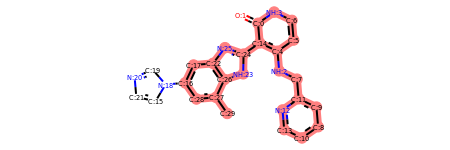

[mutate.py:108 - _calculate_common_core()] Substructere match idx: (0, 3, 6, 5, 4, 14, 19, 18, 21, 17, 20, 16, 15, 23, 22, 24, 2, 7, 11, 9, 8, 10, 13, 12)


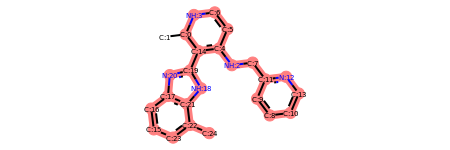

AssertionError: 

In [2]:
for conf in ['../config/2oj9-test-solvation-free-energy.yaml', '../config/2oj9-test-binding-free-energy.yaml']:
    configuration = load_config_yaml(config=conf,
                                     input_dir='../data/', output_dir='.')
    s1 = SystemStructure(configuration, 'structure1')
    s2 = SystemStructure(configuration, 'structure2')

    a = ProposeMutationRoute(s1, s2)
    cc1 = set([0, 3, 6, 5, 4, 14, 24, 23, 26, 22, 25, 17, 16, 28, 27, 29, 46, 47, 48, 45,
               41, 44, 2, 7, 11, 9, 8, 10, 13, 12, 39, 38, 36, 37, 34, 35, 30, 32, 33, 31])
    assert(set(a.get_common_core_idx_mol1()) == cc1)
    cc2 = set([0, 3, 6, 5, 4, 14, 19, 18, 21, 17, 20, 16, 15, 23, 22, 24, 43, 44, 45, 42,
               40, 41, 2, 7, 11, 9, 8, 10, 13, 12, 38, 37, 35, 36, 33, 34, 29, 31, 32, 30])
    assert(set(a.get_common_core_idx_mol2()) == cc2)
    assert(str(a.s1_tlc) == 'BMI')
    assert(str(a.s2_tlc) == 'UNK')
